# Deep Learning Overview

This tutorial accompanies the [lecture on Deep Learning Basics](https://www.youtube.com/watch?list=PLrAXtmErZgOeiKm4sgNOknGvNjby9efdf&v=O5xeyoRL95U) given as part of [MIT Deep Learning](https://deeplearning.mit.edu). Acknowledgement to amazing people involved is provided throughout the tutorial and at the end. You can watch the video on YouTube:

[![Deep Learning Basics](https://i.imgur.com/FfQVV8q.png)](https://www.youtube.com/watch?list=PLrAXtmErZgOeiKm4sgNOknGvNjby9efdf&v=O5xeyoRL95U)

In this tutorial, we mention seven important types/concepts/approaches in deep learning, introducing the first 2 and providing pointers to tutorials on the others. Here is a visual representation of the seven:

![Deep learning concepts](https://i.imgur.com/EAl47rp.png)

At a high-level, neural networks are either encoders, decoders, or a combination of both. Encoders find patterns in raw data to form compact, useful representations. Decoders generate new data or high-resolution useful infomation from those representations. As the lecture describes, deep learning discovers ways to **represent** the world so that we can reason about it. The rest is clever methods that help use deal effectively with visual information, language, sound (#1-6) and even act in a world based on this information and occasional rewards (#7).

1. **Feed Forward Neural Networks (FFNNs)** - classification and regression based on features. 
2. **Convolutional Neural Networks (CNNs)** - image classification, object detection, video action recognition, etc.
3. **Recurrent Neural Networks (RNNs)** - language modeling, speech recognition/generation, etc. 
4. **Encoder Decoder Architectures** - semantic segmentation, machine translation, etc. See [our tutorial on semantic segmentation](https://github.com/lexfridman/mit-deep-learning/blob/master/tutorial_driving_scene_segmentation/tutorial_driving_scene_segmentation.ipynb) for an example.
5. **Autoencoder** - unsupervised embeddings, denoising, etc.
6. **Generative Adversarial Networks (GANs)** - unsupervised generation of realistic images, etc. See [this TF tutorial on DCGANs](https://github.com/tensorflow/tensorflow/blob/r1.11/tensorflow/contrib/eager/python/examples/generative_examples/dcgan.ipynb) for an example.
7. **Deep Reinforcement Learning** - game playing, robotics in simulation, self-play, neural arhitecture search, etc. We'll be releasing notebooks on this soon and will link them here.

There are selective omissions and simplifications throughout these tutorials, hopefully without losing the essence of the underlying ideas. See Einstein quote...

# Generative Adversarial Network (GAN)
GANs are a form of neural network in which two sub-networks (the encoder and decoder) are trained on opposing loss functions: an encoder that is trained to produce data which is indiscernable from the true data, and a decoder that is trained to discern between the data and generated data.

생성적 적대 신경망 (Generative Adversarial Networks, GANs)은 요즘 컴퓨터 과학에서 가장 흥미로운 아이디어 중 하나입니다. 두개의 모델이 적대적인 과정을 통해 동시에 훈련됩니다. 생성자 (Generator, "모조품화가")는 진짜처럼 보이는 이미지를 생성하도록 배우는 와중에, 감별자 (Discriminator,"진품감정사")는 가짜의 이미지로부터 진짜를 구별하게 되는 것을 배우게 됩니다.

![생성자와 감별자를 그린 도표](https://tensorflow.org/tutorials/generative/images/gan1.png)

훈련과정 동안 *생성자*는 점차 실제같은 이미지를 더 잘 생성하게 되고, *감별자*는 점차 진짜와 가짜를 더 잘 구별하게됩니다. 이 과정은 *감별자*가 가짜 이미지에서 진짜 이미지를 더이상 구별하지 못하게 될때, 평형상태에 도달하게 됩니다. 

![생성자와 감별자를 그린 두번째 도표](https://tensorflow.org/tutorials/generative/images/gan2.png)




## GAN Model Architecture

<img src="https://i.imgur.com/LweaD1s.png" width="600px">

  - The GAN model architecture involves two sub-models
    - Generator. Model that is used to generate new plausible examples from the problem domain.
    - Discriminator. Model that is used to classify examples as real (from the domain) or fake (generated).
  - GANs are based on a game theoretic scenario in which the generator network must compete against an adversary. 
    - The generator network directly produces samples. 
    - Its adversary, the discriminator network, attempts to distinguish between samples drawn from the training data and samples drawn from the generator.
    - They  are playing a zero-sum game.
  - Generative modeling is an unsupervised learning problem, although a clever property of the GAN architecture is that the training of the generative model is framed as a supervised learning problem.


There are broadly 3 categories of GANs:

  - Unsupervised GANs: The generator network takes random noise as input and produces a photo-realistic image that appears very similar to images that appear in the training dataset. 
    - Examples: the original GAN, DC-GAN(Deep Convolutional GAN), pg-GAN(Progressive Growing of GAN), etc.
  - Style-Transfer GANs - Translate images from one domain to another (e.g., from horse to zebra, from sketch to colored images). 
    - Examples: CycleGAN and pix2pix.
- Conditional GANs - Jointly learn on features along with images to generate images conditioned on those features (e.g., generating an instance of a particular class).    
   - Examples: Conditional GAN, AC-GAN(Auxiliary classifier GAN), Stack-GAN, and BigGAN.

### How to train a GAN

  - Discriminator

  <img src='https://developers.google.com/machine-learning/gan/images/gan_diagram_discriminator.svg'>

    - The discriminator classifies both real data and fake data from the generator.
    - The discriminator loss penalizes the discriminator for misclassifying a real instance as fake or a fake instance as real.
    - The discriminator updates its weights through backpropagation from the discriminator loss through the discriminator network.
    - During discriminator training the generator does not train. 

  - Using the Discriminator to Train the Generator

    - Sample random noise.
    - Produce generator output from sampled random noise.
    - Get discriminator "Real" or "Fake" classification for generator output.
    - Calculate loss from discriminator classification.
    - Backpropagate through both the discriminator and generator to obtain gradients.
    - Use gradients to change only the generator weights.
    <img src = 'https://developers.google.com/machine-learning/gan/images/gan_diagram_generator.svg'>

  
#### GAN Training

<img src='https://929687.smushcdn.com/2407837/wp-content/uploads/2020/11/keras_gans_steps.png?lossy=1&strip=1&webp=0'>

Because a GAN contains two separately trained networks, its training algorithm must address two complications:

  - GANs must juggle two different kinds of training (generator and discriminator).
  - GAN convergence is hard to identify.

__Alternating Training__

The generator and the discriminator have different training processes. So how do we train the GAN as a whole?

GAN training proceeds in alternating periods:

  - The discriminator trains for one or more epochs.
  - The generator trains for one or more epochs.
  - Repeat steps 1 and 2 to continue to train the generator and discriminator networks.

__Note__

  1. We keep the generator constant during the discriminator training phase. 
  2. Similarly, we keep the discriminator constant during the generator training phase.
  3. When training GANs, our goal is not to seek a minimum loss value but instead to find some equilibrium between the two.
  4. This concept of finding an equilibrium may make sense on paper, but once you try to implement and train your own GANs, you’ll find that this is a nontrivial process.

__Convergence__

  - As the generator improves with training, the discriminator performance gets worse because the discriminator can't easily tell the difference between real and fake. If the generator succeeds perfectly, then the discriminator has a 50% accuracy. In effect, the discriminator flips a coin to make its prediction.

  - This progression poses a problem for convergence of the GAN as a whole: the discriminator feedback gets less meaningful over time. If the GAN continues training past the point when the discriminator is giving completely random feedback, then the generator starts to train on junk feedback, and its own quality may collapse.

 













### The loss function

<img src='https://editor.analyticsvidhya.com/uploads/68909architecture.PNG'>

  - $G$:	Generator Model
  - $D$:	Discriminator Model
  - $z$:	Random Noise (Fixed size input vector)
  - $x$:	Real Image
  - $G(z)$	Image generated by Generator (Fake Image)
  - $p_{data}(x)$	Probability Distribution of Real Images
  - $p_z(z)$	Probability Distribution of Fake Images
  - $D(G(z))$	Discriminator’s output when the generated image is an input
  - $D(x)$	Discriminator’s output when the real image is an input

The fight between the Generator Model and the Discriminator Model can be expressed mathematically as:

<img src='https://editor.analyticsvidhya.com/uploads/26563gan-equation.png'>

As we can see in the equation, the Generator wants to minimize the V(D, G) whereas the  Discriminator wants to maximize the V(D, G). Let us understand both terms:

  - $E_{x \sim p_{data}(x)} [\log D(x)]$: Average log probability of D when real image is input.
  - $E_{z \sim p_z(z)} [\log(1 – D(G(z)))]$: Average log probability of D when the generated image is input.


#### Discriminator’s perspective

The Discriminator wants to maximize the loss function $V(D, G)$ by correctly classifying real and fake images.

The first term suggests that the Discriminator wants to make $D(x)$ as close to 1 as possible, i.e. correctly classifying real images as real.

The second term suggests that the Discriminator wants to make $D(G(x))$ as close to 0 as possible, i.e. correctly classifying fake images as fake and thus maximize the term eventually (1 – smaller number will result in a larger number). Note: Probability lies in the range of 0-1.

Thus, The Discriminator tries to maximize both the terms.

#### Generator’s perspective

The Generator wants to minimize the loss function $V(D, G)$ by generating images that look like real images and tries to fool the Discriminator. 

The second term suggests that the Generator wants to make $D(G(z))$ as close to 1 (instead of 0) as possible and thus minimize the term eventually (1 – larger number will result in a smaller number). So that the Discriminator fails and misclassifies the images.

Thus, The Generator tries to minimize the second term.

## Amazing Applications of GAN

 - [Image to Image Translation] (https://arxiv.org/abs/1611.07004)

<img src = 'https://editor.analyticsvidhya.com/uploads/73176img-to-img-translation.PNG'>

  - [Text to Image Translation] (https://arxiv.org/abs/1610.02454)

<img src='https://editor.analyticsvidhya.com/uploads/37782text-image-translation.PNG'>

  - [Photos to Emojis](https://arxiv.org/abs/1611.02200)

<img src='https://editor.analyticsvidhya.com/uploads/12712photos-to-emoji.PNG'>

  - [Synthesizing High-Resolution Images with NVIDIA StyleGAN2](https://www.youtube.com/watch?v=9QuDh3W3lOY)

<img src='https://raw.githubusercontent.com/lucidrains/stylegan2-pytorch/master/samples/celebrities.jpg'>

## First Example: DCGAN(Deep Convolution GAN)

We demonstrates DCGAN on the MNIST dataset. The following animation shows a series of images produced by the *generator* as it was trained for 50 epochs. The images begin as random noise, and increasingly resemble hand written digits over time.

![sample output](https://tensorflow.org/images/gan/dcgan.gif)

### Setup

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
# To generate GIFs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-rpng2age
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-rpng2age
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.012eaa398500ba825f499a42871468b853e6568ab_-py3-none-any.whl size=154607 sha256=3082bd87ba3ced52cf16cb5e9d28aec24bc944c6a8430ad5d5107b4b45c3ba7d
  Stored in directory: /tmp/pip-ephem-wheel-cache-gdj27tkb/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Failed to build tensorflow-docs
    Running setup.py install for tensorflow-docs ... done
  DEPRECATION: tensorflow-docs was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import time

from IPython import display

### Load and prepare the dataset

You will use the MNIST dataset to train the generator and the discriminator. The generator will generate handwritten digits resembling the MNIST data.

In [ ]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## Create the models

Both the generator and discriminator are defined using the [Keras Sequential API](https://www.tensorflow.org/guide/keras#sequential_model).

### The Generator

The generator uses `tf.keras.layers.Conv2DTranspose` (upsampling) layers to produce an image from a seed (random noise). Start with a `Dense` layer that takes this seed as input, then upsample several times until you reach the desired image size of 28x28x1. Notice the `tf.keras.layers.LeakyReLU` activation for each layer, except the output layer which uses tanh.

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

In [ ]:
g = make_generator_model()
g.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12544)             1254400   
_________________________________________________________________
batch_normalization_3 (Batch (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)        

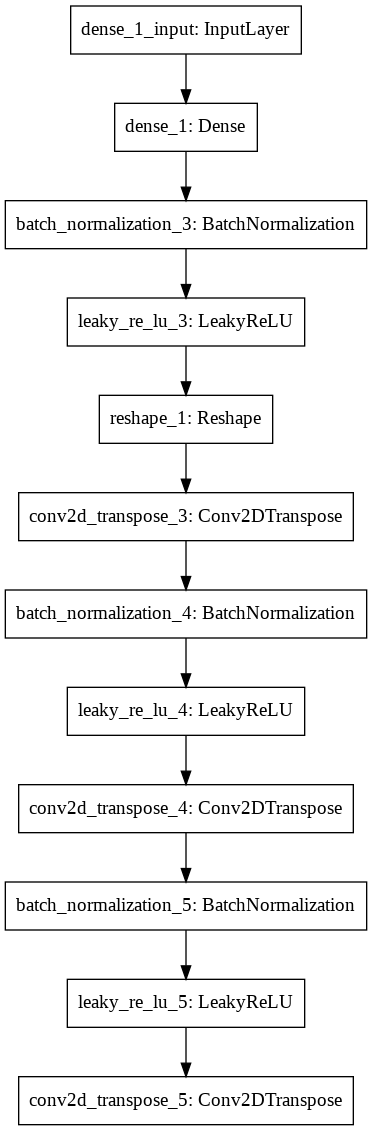

In [ ]:
plot_model(g)

Use the (as yet untrained) generator to create an image.

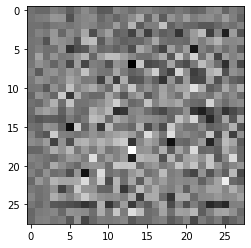

In [ ]:
noise = tf.random.normal((1, 100))
generated_image = g(noise, training=False)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

### The Discriminator

The discriminator is a CNN-based image classifier.

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
d = make_discriminator_model()
d.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

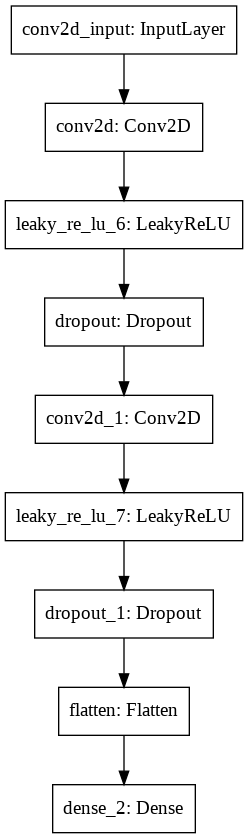

In [ ]:
plot_model(d)

Use the (as yet untrained) discriminator to classify the generated images as real or fake. The model will be trained to output positive values for real images, and negative values for fake images.

In [ ]:
decision = d(generated_image)
print (decision)

tf.Tensor([[-0.00370937]], shape=(1, 1), dtype=float32)


## Define the loss and optimizers

Define loss functions and optimizers for both models.


In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True) # logit 변환(from_logits=True)은 [0, 1] 범위를 가지는 확률을 [-inf, inf] 범위를 가지는 값으로 변환해주는 변환

### Discriminator loss

This method quantifies how well the discriminator is able to distinguish real images from fakes. It compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s.

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### Generator loss
The generator's loss quantifies how well it was able to trick the discriminator. Intuitively, if the generator is performing well, the discriminator will classify the fake images as real (or 1). Here, compare the discriminators decisions on the generated images to an array of 1s.

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

The discriminator and the generator optimizers are different since you will train two networks separately.

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### Save checkpoints
This notebook also demonstrates how to save and restore models, which can be helpful in case a long running training task is interrupted.

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=g,
                                 discriminator=d)

## Define the training loop


In [ ]:
EPOCHS = 100
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

The training loop begins with generator receiving a random seed as input. That seed is used to produce an image. The discriminator is then used to classify real images (drawn from the training set) and fakes images (produced by the generator). The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator.

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = g(noise, training=True)

      real_output = d(images, training=True)
      fake_output = d(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, g.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, d.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, g.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, d.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(g,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(g,
                           epochs,
                           seed)

**Generate and save images**


In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('/content/images/image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

## Train the model
Call the `train()` method defined above to train the generator and discriminator simultaneously. Note, training GANs can be tricky. It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).

At the beginning of the training, the generated images look like random noise. As training progresses, the generated digits will look increasingly real. After about 50 epochs, they resemble MNIST digits. This may take about one minute / epoch with the default settings on Colab.

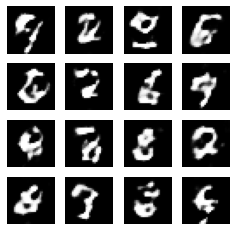

Time for epoch 9 is 13.488185405731201 sec


KeyboardInterrupt: ignored

In [ ]:
import time
start = time.time()
train(train_dataset, EPOCHS)

In [ ]:
print('Training Time in seconds: ', time.time()-start)
print('Training Time in mninutes: ', (time.time()-start)/60)

Restore the latest checkpoint.

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

## Create a GIF


In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [ ]:
display_image(EPOCHS)

Use `imageio` to create an animated gif using the images saved during training.

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)


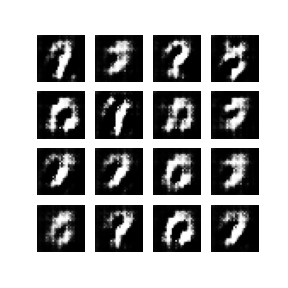

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

##### Another way for generating and displaying an animated gif.

In [ ]:
# glob package: glob는 파일들의 리스트를 뽑을 때 사용하는데, 파일의 경로명을 이용해서 입맛대로 요리할 수 있답니다.

from glob import glob
glob('/content/sample_data/*.csv')


['/content/sample_data/california_housing_test.csv',
 '/content/sample_data/california_housing_train.csv',
 '/content/sample_data/mnist_train_small.csv',
 '/content/sample_data/mnist_test.csv']

In [ ]:
# !pip install Pillow
import glob
from PIL import Image

# filepaths
fp_in = "/content/images/*.png"
fp_out = "/content/image.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
print(imgs)
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)



[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=288x288 at 0x7F305415CA90>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=288x288 at 0x7F30A60F3C10>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=288x288 at 0x7F30A60F38D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=288x288 at 0x7F30A60F3810>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=288x288 at 0x7F30A60F3990>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=288x288 at 0x7F30A60F34D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=288x288 at 0x7F30A60F3290>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=288x288 at 0x7F30A60F37D0>]


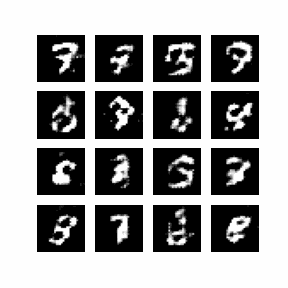

In [ ]:
from IPython.display import Image
Image(open('/content/image.gif','rb').read())


In [ ]:
!zip -r /content/images.zip images/*.png
from google.colab import files
files.download("/content/images.zip")

	zip warning: name not matched: images/*.png

zip error: Nothing to do! (try: zip -r /content/images.zip . -i images/*.png)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!unzip /content/images.zip


Archive:  /content/images.zip
replace model.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: model.png               


In [ ]:
y